In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cities = pd.read_csv("../data/cities.csv")
cities.rename(columns = {'id': "city_id"}, inplace=True)
cities.sample(10)

,city_id,name,coords,start_year,url_name,country,country_state
110,316,Amiens,POINT(2.300004027 49.90037661),2018.0,amiens,France,NaN
209,154,Des Moines,POINT(-93.61666667 41.58333333),2017.0,des-moines,United States,Iowa
56,41,Darwin,POINT(130.85 -12.46666667),2017.0,darwin,Australia,NaN
126,83,Nagasaki,POINT(129.95 32.8),2017.0,nagasaki,Japan,NaN
151,99,Prague,POINT(14.43333333 50.08333333),2017.0,prague,Czech Republic,NaN
316,66,Lima,POINT(-77.018611 -12.035),1984.0,lima,Peru,NaN
191,135,Bangor,POINT(-68.78333333 44.8),2017.0,bangor,United States,Maine
237,182,Klamath Falls,POINT(-121.7333333 42.16666667),2017.0,klamath-falls,United States,Ore.
145,333,Cayenne,POINT(-52.33002059 4.932992166),2018.0,cayenne-france,France,NaN
19,276,Biarritz,POINT(-1.561594891 43.47327537),2018.0,biarritz,France,NaN


In [3]:
lines = pd.read_csv("../data/lines.csv")
lines.sample(16)

,id,city_id,name,url_name,color,system_id,transport_mode_id
945,1033,114,Chuo-Ichiba Line,1033-chuo-ichiba-line,#5f0101,410,5.0
795,911,27,44,911-44,#eabc00,378,NaN
422,524,89,Yellow,524-yellow,#ffff00,76,NaN
303,205,69,Metropolitan Line -,205-metropolitan-line,#a30b58,259,3.0
659,759,236,Teal Line Light Rail,759-central-link,#23f5cd,221,NaN
837,940,82,16,940-16,#3964a9,380,NaN
771,876,114,Asukayama Line,876-asukayama-line,#5f0101,325,5.0
180,271,106,Linha 11 • Coral (CPTM),271-linha-11---coral,#ef7577,94,4.0
512,548,147,Brown Line,548-brown-line,#62361b,132,5.0
613,705,77,5,705-5,#000,354,5.0


In [4]:
station_lines = pd.read_csv('../data/station_lines.csv')
station_lines.sample(16)

,id,station_id,line_id,city_id,created_at,updated_at
4756,4867,1514,146,69,2017-11-21 00:00:00,2017-11-21 00:00:00
4324,4434,1973,185,15,2017-11-21 00:00:00,2017-11-21 00:00:00
13234,15474,15140,1360,91,2018-10-30 04:40:05.894452,2018-10-30 04:40:05.894452
5943,6092,5293,428,114,2017-11-21 00:00:00,2017-11-21 00:00:00
2305,2406,3997,342,252,2017-11-21 00:00:00,2017-11-21 00:00:00
8724,11138,11270,1059,255,2018-04-29 20:00:56.288883,2018-04-29 20:00:56.288883
15925,16441,16117,1482,91,2019-02-01 22:47:56.9103,2019-02-01 22:47:56.9103
2437,2538,8371,672,114,2017-11-21 00:00:00,2017-11-21 00:00:00
13411,6244,2879,238,103,2017-11-21 00:00:00,2017-11-21 00:00:00
2313,2414,4002,342,252,2017-11-21 00:00:00,2017-11-21 00:00:00


In [5]:
stations = pd.read_csv('../data/stations.csv')
stations

,id,name,geometry,buildstart,opening,closure,city_id
0,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114
1,6003,Kossuth Lajos tér,POINT(19.0462376564033 47.5054880717671),0.0,0.0,999999.0,29
2,7732,Saint-Charles,POINT(5.3801556 43.3024646),1973.0,1977.0,999999.0,74
3,7695,Keisei Makuhari-Hongo,POINT(140.042146725175 35.6726021159981),1991.0,1991.0,999999.0,114
4,7726,Chartreux,POINT(5.4014815 43.309129),1973.0,1977.0,999999.0,74
...,...,...,...,...,...,...,...
15789,16554,Shinomiya,POINT(135.823937214498 34.9918683039252),1912.0,1912.0,999999.0,91
15790,16555,Keihan Yamashina,POINT(135.816689306704 34.992068923936),1912.0,1912.0,999999.0,91
15791,16556,Hino-oka,POINT(135.799931852138 34.9968986641574),1912.0,1912.0,1997.0,91
15792,16557,Kujoyama,POINT(135.792375683554 35.0018274164674),1936.0,1936.0,1997.0,91


In [6]:
systems = pd.read_csv('../data/stations.csv')
systems

,id,name,geometry,buildstart,opening,closure,city_id
0,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114
1,6003,Kossuth Lajos tér,POINT(19.0462376564033 47.5054880717671),0.0,0.0,999999.0,29
2,7732,Saint-Charles,POINT(5.3801556 43.3024646),1973.0,1977.0,999999.0,74
3,7695,Keisei Makuhari-Hongo,POINT(140.042146725175 35.6726021159981),1991.0,1991.0,999999.0,114
4,7726,Chartreux,POINT(5.4014815 43.309129),1973.0,1977.0,999999.0,74
...,...,...,...,...,...,...,...
15789,16554,Shinomiya,POINT(135.823937214498 34.9918683039252),1912.0,1912.0,999999.0,91
15790,16555,Keihan Yamashina,POINT(135.816689306704 34.992068923936),1912.0,1912.0,999999.0,91
15791,16556,Hino-oka,POINT(135.799931852138 34.9968986641574),1912.0,1912.0,1997.0,91
15792,16557,Kujoyama,POINT(135.792375683554 35.0018274164674),1936.0,1936.0,1997.0,91


In [7]:
track_lines = pd.read_csv('../data/track_lines.csv')
track_lines

,id,section_id,line_id,created_at,updated_at,city_id
0,2494,1278,343,2017-11-21 00:00:00,2017-11-21 00:00:00,252
1,4124,4477,779,2017-11-21 00:09:55.135507,2017-11-21 00:09:55.135507,63
2,2495,21,9,2017-11-21 00:00:00,2017-11-21 00:00:00,1
3,2496,940,228,2017-11-21 00:00:00,2017-11-21 00:00:00,79
4,4129,4478,793,2017-11-21 17:44:39.765832,2017-11-21 17:44:39.765832,48
...,...,...,...,...,...,...
9752,10699,10530,1611,2019-03-06 22:23:46.008756,2019-03-06 22:23:46.008756,91
9753,10700,10531,1611,2019-03-06 22:27:46.532431,2019-03-06 22:27:46.532431,91
9754,10701,10532,1611,2019-03-06 22:30:58.779519,2019-03-06 22:30:58.779519,91
9755,10702,10533,1610,2019-03-08 21:57:21.68915,2019-03-08 21:57:21.68915,91


In [8]:
tracks = pd.read_csv('../data/tracks.csv')
tracks

,id,geometry,buildstart,opening,closure,length,city_id
0,1911,"LINESTRING(19.0817752 47.5005079,19.0817355 47...",0.0,0.0,999999.0,6719,29
1,2563,"LINESTRING(16.4151057 48.1907238,16.4156455 48...",0.0,0.0,999999.0,199,118
2,2557,"LINESTRING(16.4164437 48.1839655,16.4161534 48...",0.0,0.0,999999.0,925,118
3,2558,"LINESTRING(16.4164901 48.1839473,16.416198 48....",0.0,0.0,999999.0,881,118
4,2564,"LINESTRING(16.415259 48.1908074,16.4153634 48....",0.0,0.0,999999.0,213,118
...,...,...,...,...,...,...,...
9266,9732,"LINESTRING(-3.838067 56.0044551,-3.8385588 56....",0.0,0.0,999999.0,383,48
9267,9734,"LINESTRING(-3.8549229 55.9960854,-3.8544735 55...",0.0,0.0,999999.0,28,48
9268,9735,"LINESTRING(-3.8597111 55.9955538,-3.8572319 55...",0.0,0.0,999999.0,305,48
9269,9736,"LINESTRING(-3.8544735 55.9961285,-3.8529015 55...",0.0,0.0,999999.0,828,48


AttributeError: 'AxesSubplot' object has no attribute 'barplot'

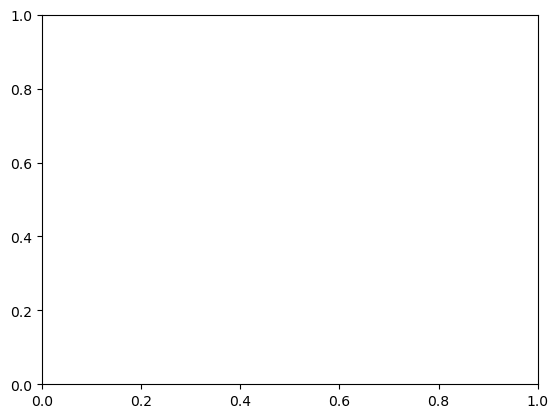

In [54]:
ranked_countries = cities["country"].value_counts().sort_values(ascending=False)

top_country = ranked_countries.max()
top_country_name = ranked_countries.idxmax()

bottom_country = ranked_countries.min()
bottom_country_name = ranked_countries.idxmax()

median_country = ranked_countries.median()
median_country_name = ranked_countries.index[int((len(ranked_countries) -1 ) / 2)]

q3a_country = ranked_countries.iloc[17]
q3a_country_name = ranked_countries.index[17]

q3b_country = ranked_countries.iloc[18]
q3b_country_name = ranked_countries.index[18]


q1a_country = ranked_countries.iloc[-18]
q1a_country_name = ranked_countries.index[-18]

q1b_country = ranked_countries.iloc[-19]
q1b_country_name = ranked_countries.index[-19]

countries = [
    top_country_name, q3a_country_name, 
    q3b_country_name, median_country_name, 
    q1a_country_name, q1b_country_name,
    bottom_country_name]

values = [
    top_country, q3a_country,
    q3b_country, median_country,
    q1a_country, q1b_country,
    bottom_country
]

fig, ax = plt.subplots()

ax.barplot(countries, values)


